# CREATING INTERFACE WITH TKINTER LIBRARY

<b>The aim of this study is not to develop a very good machine learning model. It is essential to establish a base model with the data set we have and to create an interface for this model.

<b>Importing required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import tkinter as tk

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [2]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [3]:
df_train = pd.read_csv('diabetes.csv')

In [4]:
check_df(df_train)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1

In [5]:
target = 'Outcome'

In [6]:
cat_col, num_col, cat_but_car = grab_col_names(df_train)
cat_col  = [col for col in cat_col if col !=target]

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
df_train = one_hot_encoder(df_train,cat_col,True)

In [8]:
X = df_train.drop(target, axis=1)
y = df_train[target]

In [9]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=17)

In [10]:
model = LogisticRegression(random_state=17).fit(X_train,y_train)

C:\ProgramData\Anaconda3\envs\batuhan\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
y_pred = model.predict(X_test)

In [12]:
cros_val = cross_validate(estimator=model,
                          X=X_test,
                          y=y_test,
                          scoring='accuracy',
                          cv=10,n_jobs=-1)

In [13]:
cros_val['test_score'].mean()

0.7638551031200423

# Create ConfusionMatrixDisplay

<b>With the fitted model, we compute the predictions of the model on the test dataset. These predictions are used to compute the confusion matrix which is plotted with the ConfusionMatrixDisplay.

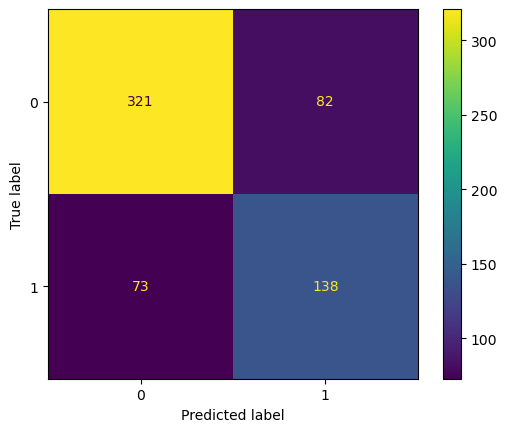

In [14]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Create RocCurveDisplay

<b>The roc curve requires either the probabilities or the non-thresholded decision values from the estimator. Since the logistic regression provides a decision function, we will use it to plot the roc curve:

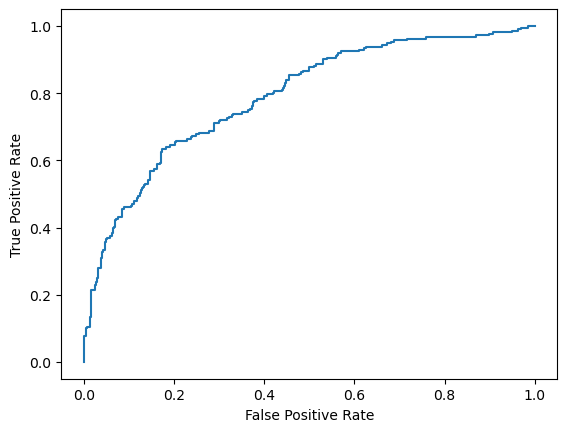

In [15]:
y_score = model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# TKINTER GUI

In [16]:
root = tk.Tk()

In [17]:
canvas1 = tk.Canvas(root,width=400,height=400)
canvas1.pack()

In [18]:
label1 = tk.Label(root,text='Pregnancies: ')

canvas1.create_window(100,100,window=label1)
entry1 = tk.Entry(root)
canvas1.create_window(200,100,window=entry1)

2

In [19]:
label2 = tk.Label(root,text='Glucose: ')

canvas1.create_window(100,120,window=label2)
entry2 = tk.Entry(root)
canvas1.create_window(200,120,window=entry2)

4

In [20]:
label3 = tk.Label(root,text='BloodPressure: ')

canvas1.create_window(90,140,window=label3)
entry3 = tk.Entry(root)
canvas1.create_window(200,140,window=entry3)

6

In [21]:
label4 = tk.Label(root,text='SkinThickness: ')

canvas1.create_window(100,160,window=label4)
entry4 = tk.Entry(root)
canvas1.create_window(200,160,window=entry4)

8

In [22]:
label5 = tk.Label(root,text='Insulin: ')

canvas1.create_window(100,180,window=label5)
entry5 = tk.Entry(root)
canvas1.create_window(200,180,window=entry5)

10

In [23]:
label6 = tk.Label(root,text='BMI: ')

canvas1.create_window(100,200,window=label6)
entry6 = tk.Entry(root)
canvas1.create_window(200,200,window=entry6)

12

In [24]:
label7 = tk.Label(root,text='DiabetesPedigreeFunction: ')

canvas1.create_window(68,220,window=label7)
entry7 = tk.Entry(root)
canvas1.create_window(200,220,window=entry7)

14

In [25]:
label8 = tk.Label(root,text='Age: ')

canvas1.create_window(100,240,window=label8)
entry8 = tk.Entry(root)
canvas1.create_window(200,240,window=entry8)

16

In [26]:
def values():
    global Pregnancies
    Pregnancies = int(entry1.get())
    global Glucose
    Glucose = float(entry2.get())
    global BloodPressure
    BloodPressure = float(entry3.get())
    global SkinThickness
    SkinThickness = float(entry4.get())
    global Insulin
    Insulin = float(entry5.get())
    global BMI
    BMI = float(entry6.get())
    global DiabetesPedigreeFunction
    DiabetesPedigreeFunction = float(entry7.get())
    global Age
    Age = int(entry8.get())

    prediction_result = ('Outcome: ',model.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]]))

    label_Prediction = tk.Label(root,text=prediction_result,bg='lawngreen')
    canvas1.create_window(200,260,window=label_Prediction)

In [27]:
button1 = tk.Button(root,text='Calculate Whether Diabetes',command=values,bg='orange')
canvas1.create_window(200,300,window=button1)

17

In [28]:
root.mainloop()

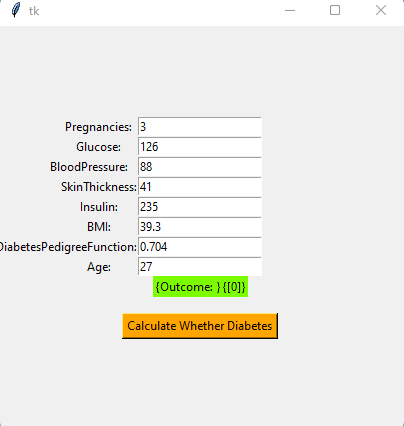